<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [9]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Dimensiones del dataset: (569, 31)

Tipos de datos:
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
con

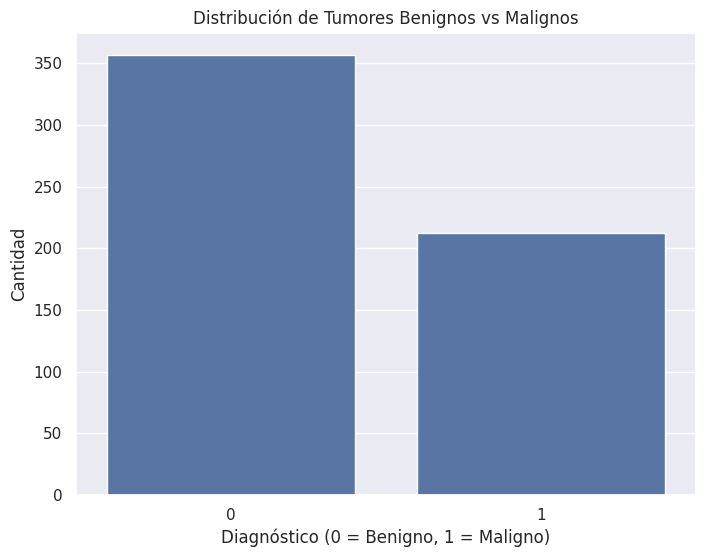

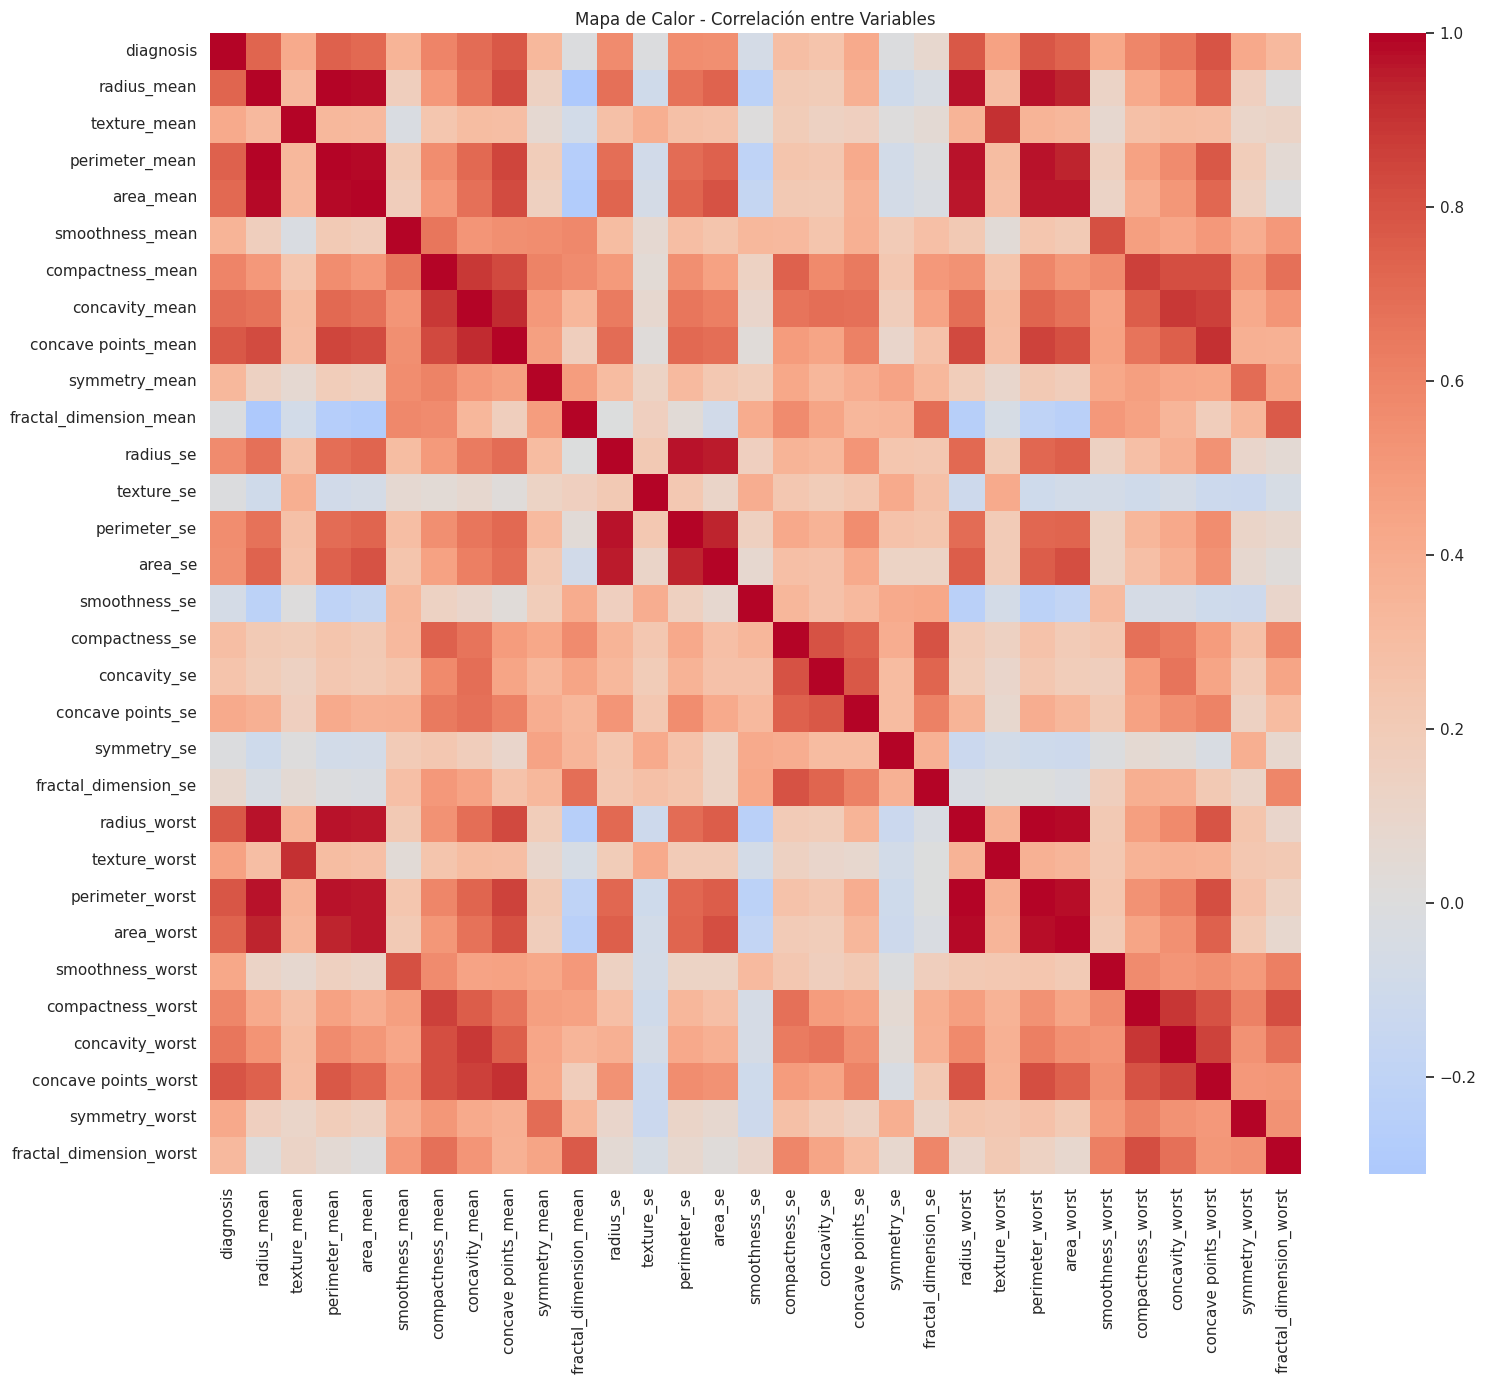


Correlación con diagnóstico (ordenado):
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se   

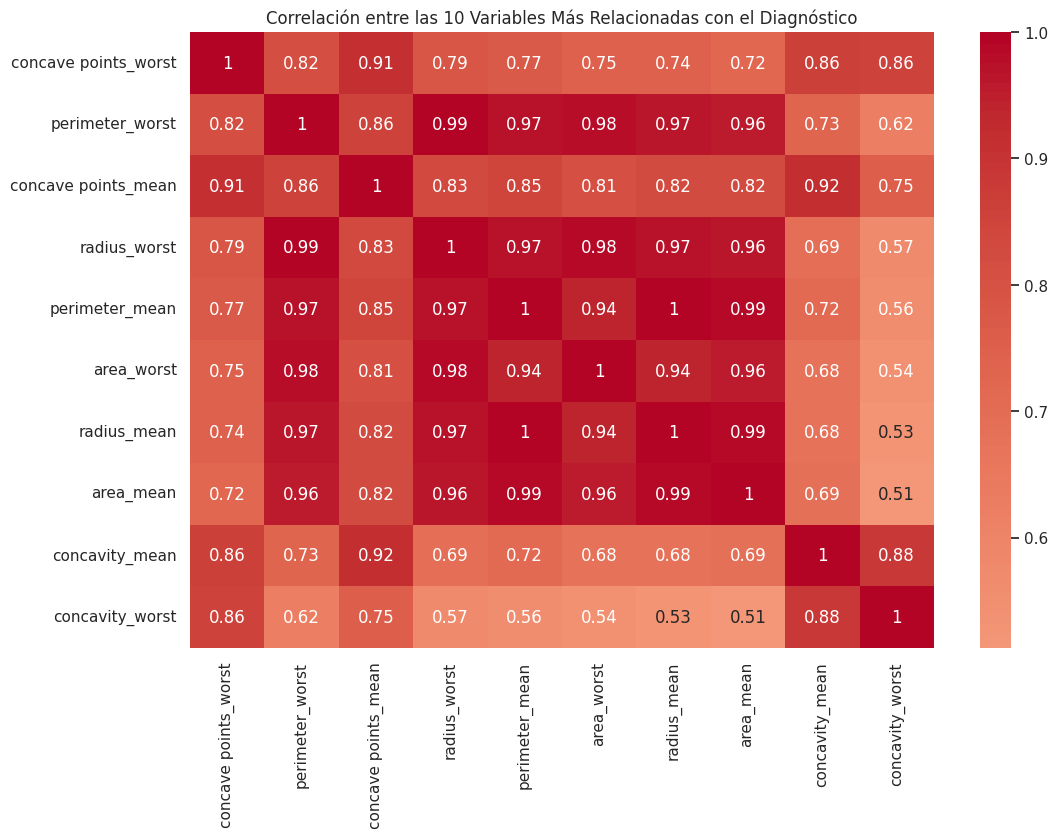

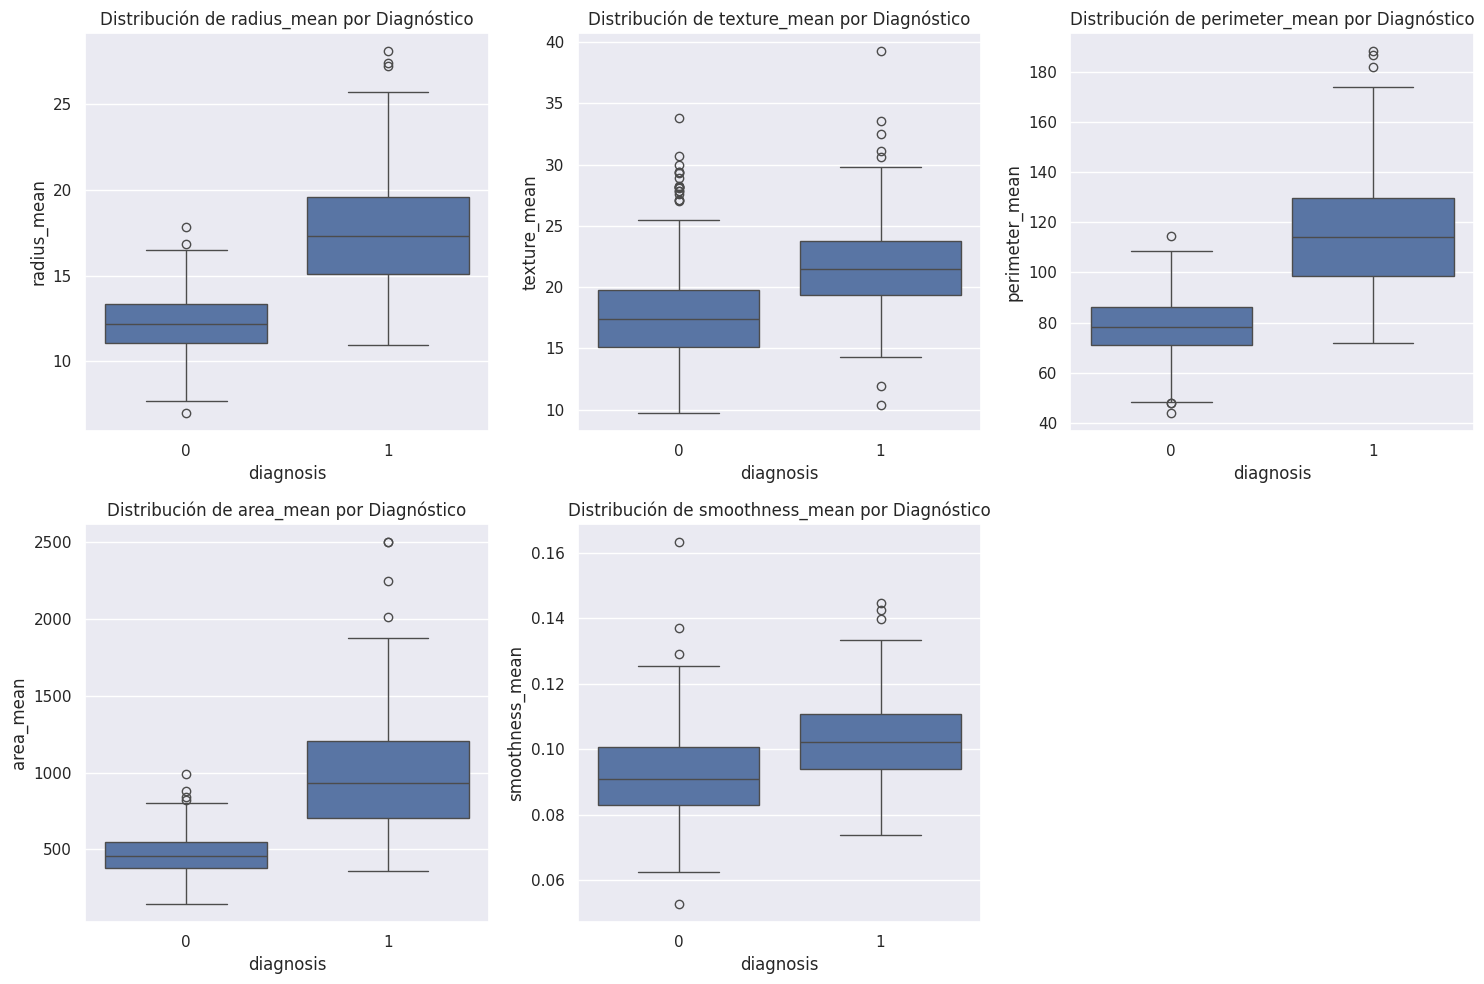

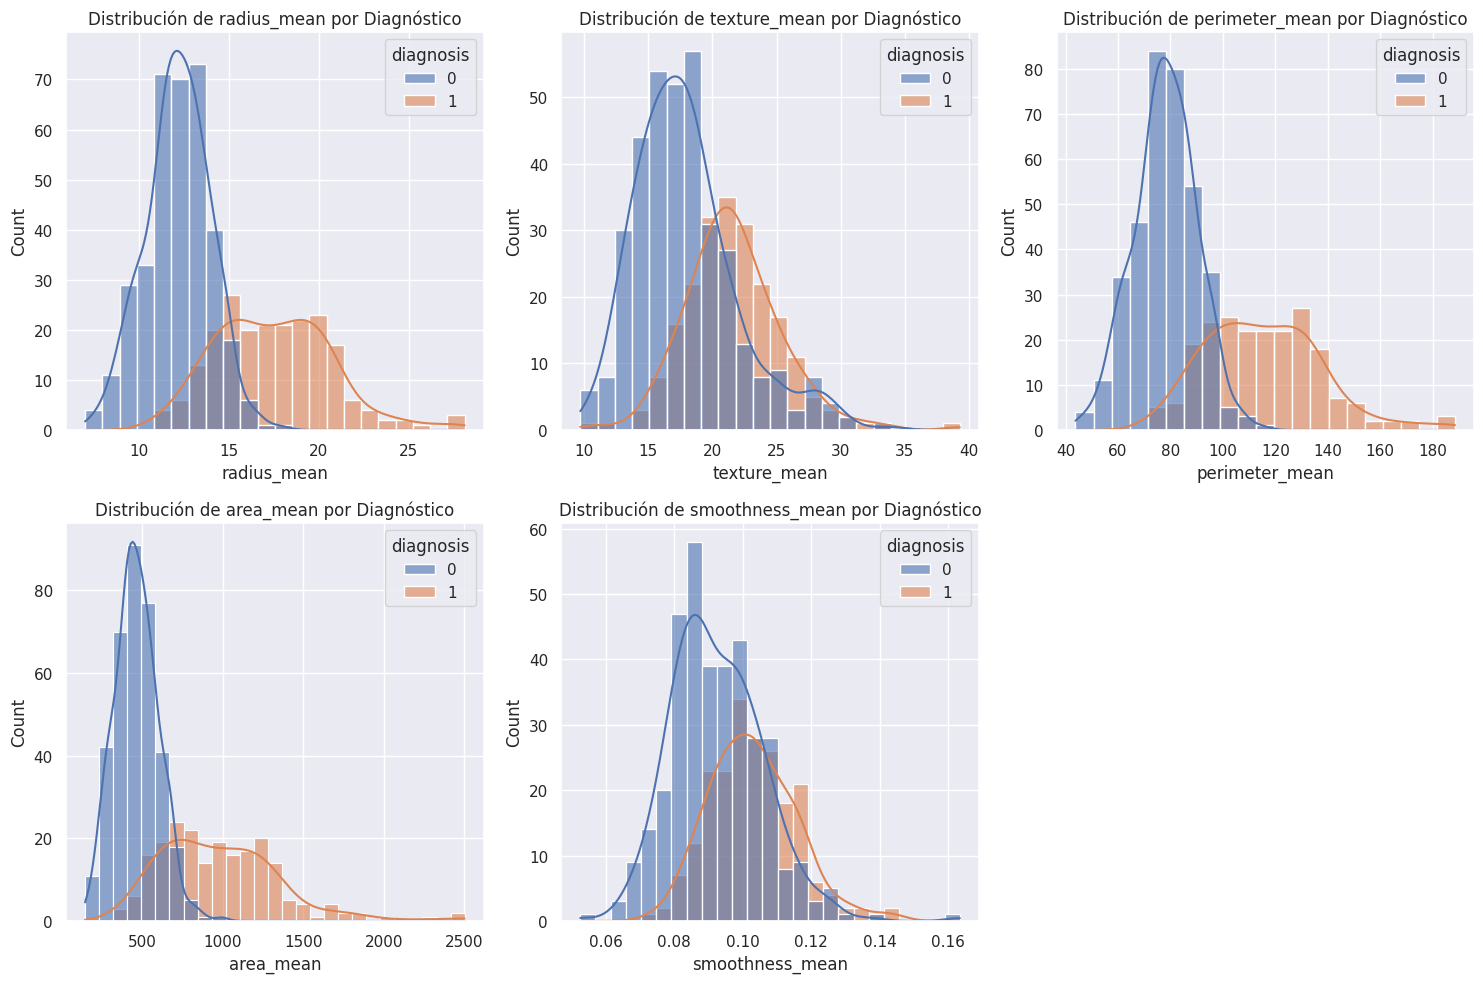


Valores atípicos por variable:
area_se                    65
radius_se                  38
perimeter_se               38
area_worst                 35
smoothness_se              30
compactness_se             28
fractal_dimension_se       28
symmetry_se                27
area_mean                  25
fractal_dimension_worst    24
symmetry_worst             23
concavity_se               22
texture_se                 20
concave points_se          19
concavity_mean             18
radius_worst               17
compactness_mean           16
compactness_worst          16
perimeter_worst            15
symmetry_mean              15
fractal_dimension_mean     15
radius_mean                14
perimeter_mean             13
concavity_worst            12
concave points_mean        10
texture_mean                7
smoothness_worst            7
smoothness_mean             6
texture_worst               5
diagnosis                   0
concave points_worst        0
dtype: int64


In [10]:
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nTipos de datos:\n{df.dtypes}")
print(f"\nValores nulos por columna:\n{df.isnull().sum()}")

# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas:\n{df.describe()}")

# Distribución de la variable objetivo
print(f"\nDistribución de diagnóstico:\n{df['diagnosis'].value_counts()}")
print(f"Proporción Benigno (0) vs Maligno (1): {df['diagnosis'].value_counts(normalize=True)}")

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Tumores Benignos vs Malignos')
plt.xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)')
plt.ylabel('Cantidad')
plt.show()

# Análisis de correlación
plt.figure(figsize=(16, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor - Correlación entre Variables')
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo
target_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)
print(f"\nCorrelación con diagnóstico (ordenado):\n{target_correlation}")

# Visualización de las 10 variables más correlacionadas
top_10_features = target_correlation.index[1:11]  # Excluimos diagnosis itself
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_10_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre las 10 Variables Más Relacionadas con el Diagnóstico')
plt.show()

# Boxplots para comparar distribuciones entre benignos y malignos
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Distribución de {feature} por Diagnóstico')
plt.tight_layout()
plt.show()

# Histogramas comparativos
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, alpha=0.6)
    plt.title(f'Distribución de {feature} por Diagnóstico')
plt.tight_layout()
plt.show()

# Identificación de valores atípicos usando IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(f"\nValores atípicos por variable:\n{outliers.sort_values(ascending=False)}")

### Correlaciones y Capacidad Discriminativa
- **Variables altamente correlacionadas**: Se observó alta correlación entre medidas geométricas como `radius_mean`, `perimeter_mean`, y `area_mean`, lo que sugiere redundancia informativa.

- **Variables más discriminativas**:
  - `concave points_worst`
  - `perimeter_worst`
  - `concavity_worst`
  - `radius_worst`

Estas variables relacionadas con la concavidad y tamaño muestran mayor poder discriminativo entre clases.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [12]:
from sklearn.feature_selection import SelectKBest, f_classif  # Corrección aquí
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Separar características y variable objetivo
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Estrategia 1: Normalización con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Estrategia 2: Eliminación de características altamente correlacionadas
def remove_highly_correlated_features(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return to_drop

high_corr_features = remove_highly_correlated_features(X)
print(f"Características a eliminar por alta correlación: {high_corr_features}")

X_reduced = X.drop(high_corr_features, axis=1)
X_reduced_scaled = scaler.fit_transform(X_reduced)

# Estrategia 3: Transformación de potencia para normalizar distribuciones
power_transformer = PowerTransformer(method='yeo-johnson')
X_transformed = power_transformer.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)

# Estrategia 4: Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print(f"\nCaracterístcas seleccionadas (KBest): {list(selected_features)}")

# Crear DataFrame con características seleccionadas
X_selected_df = pd.DataFrame(X_selected, columns=selected_features, index=X.index)



# Definimos el conjunto de datos principal para las siguientes secciones
X_processed = X_scaled  # Usaremos el conjunto escalado completo

Características a eliminar por alta correlación: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']

Característcas seleccionadas (KBest): ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


Justificación de las estrategias de preprocesamiento:
1. StandardScaler: Esencial para algoritmos sensibles a la escala como SVM y KNN
2. Eliminación de características correlacionadas: Reduce redundancia y overfitting
3. PowerTransformer: Mejora la normalidad de las distribuciones
4. SelectKBest: Selecciona las características más relevantes para el modelo


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por los componentes principales: [0.44272026 0.18971182]
Varianza total explicada: 0.6324


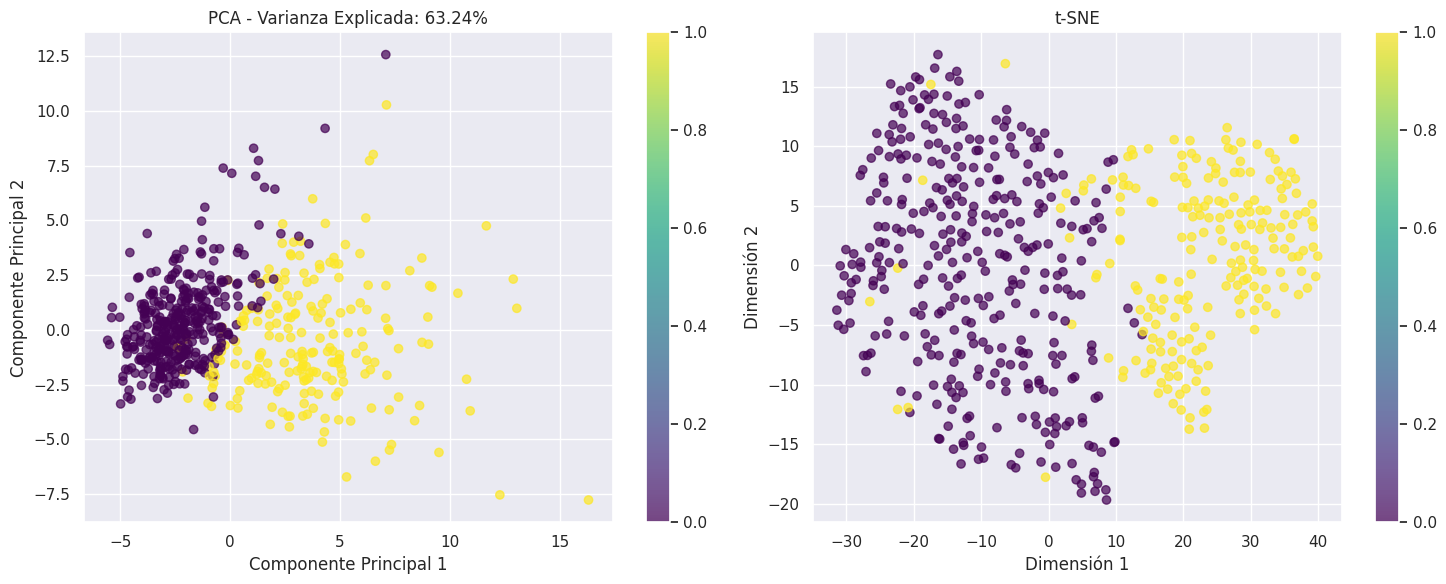

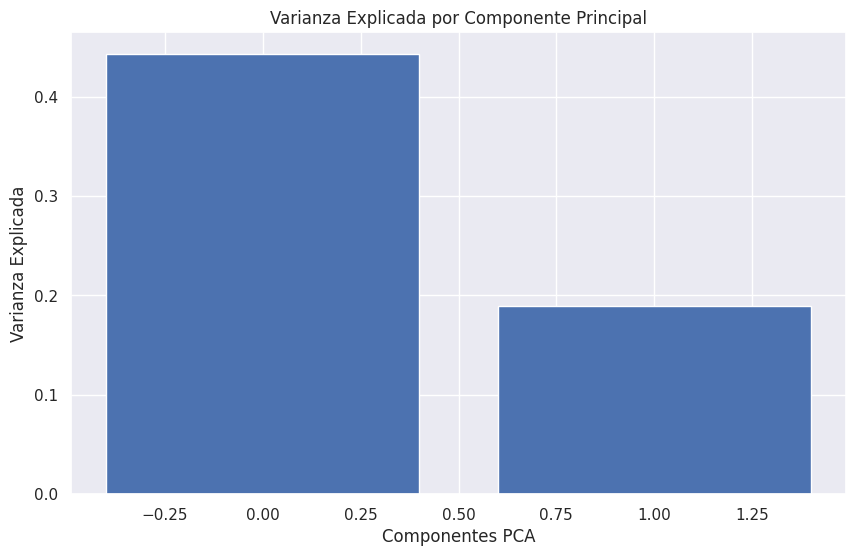

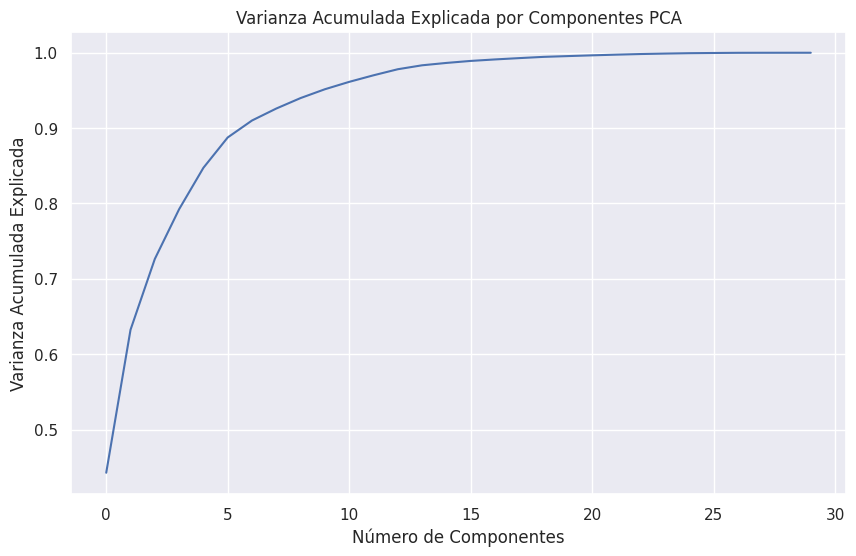

In [13]:
from sklearn.manifold import TSNE

# Usar el conjunto procesado de la sección anterior
X_for_dimensionality = X_processed

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_for_dimensionality)

# Varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por los componentes principales: {explained_variance}")
print(f"Varianza total explicada: {sum(explained_variance):.4f}")

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_for_dimensionality)

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PCA
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
ax1.set_title(f'PCA - Varianza Explicada: {sum(explained_variance):.2%}')
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')
plt.colorbar(scatter1, ax=ax1)

# t-SNE
scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
ax2.set_title('t-SNE')
ax2.set_xlabel('Dimensión 1')
ax2.set_ylabel('Dimensión 2')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

# Análisis de componentes principales
plt.figure(figsize=(10, 6))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('Componentes PCA')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

# PCA acumulativo
pca_full = PCA()
pca_full.fit(X_for_dimensionality)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes PCA')
plt.grid(True)
plt.show()

###PCA :
- **Varianza explicada**: Los primeros 2 componentes capturan ~63% de la varianza total
- **Separabilidad**: Buena separación visual entre clases, aunque con cierto solapamiento
- **Ventaja**: Preserva la estructura global y es computacionalmente eficiente

###t-SNE :
- **Separabilidad**: Mejor agrupación y separación entre clases benignas y malignas
- **Ventaja**: Captura relaciones no lineales y patrones locales
- **Limitación**: No preserva distancias globales y es más costoso computacionalmente


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.



Logistic Regression 
Mejores parámetros: {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.9756
AUC-ROC: 0.9980

SVM 
Mejores parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
AUC-ROC: 0.9927

Random Forest 
Mejores parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
AUC-ROC: 0.9929

KNN 
Mejores parámetros: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9386
Precision: 0.9730
Recall: 0.8571
F1-Score: 0.9114
AUC-ROC: 0.9825

XGBoost 
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1-Score: 0.9500
AUC-ROC: 0.9967

 Comparación de modelos 
                     accuracy precision    recall        f1   auc_roc  \
Logistic Regression  0.982456       1.0  0.952381   0.97561  0.99

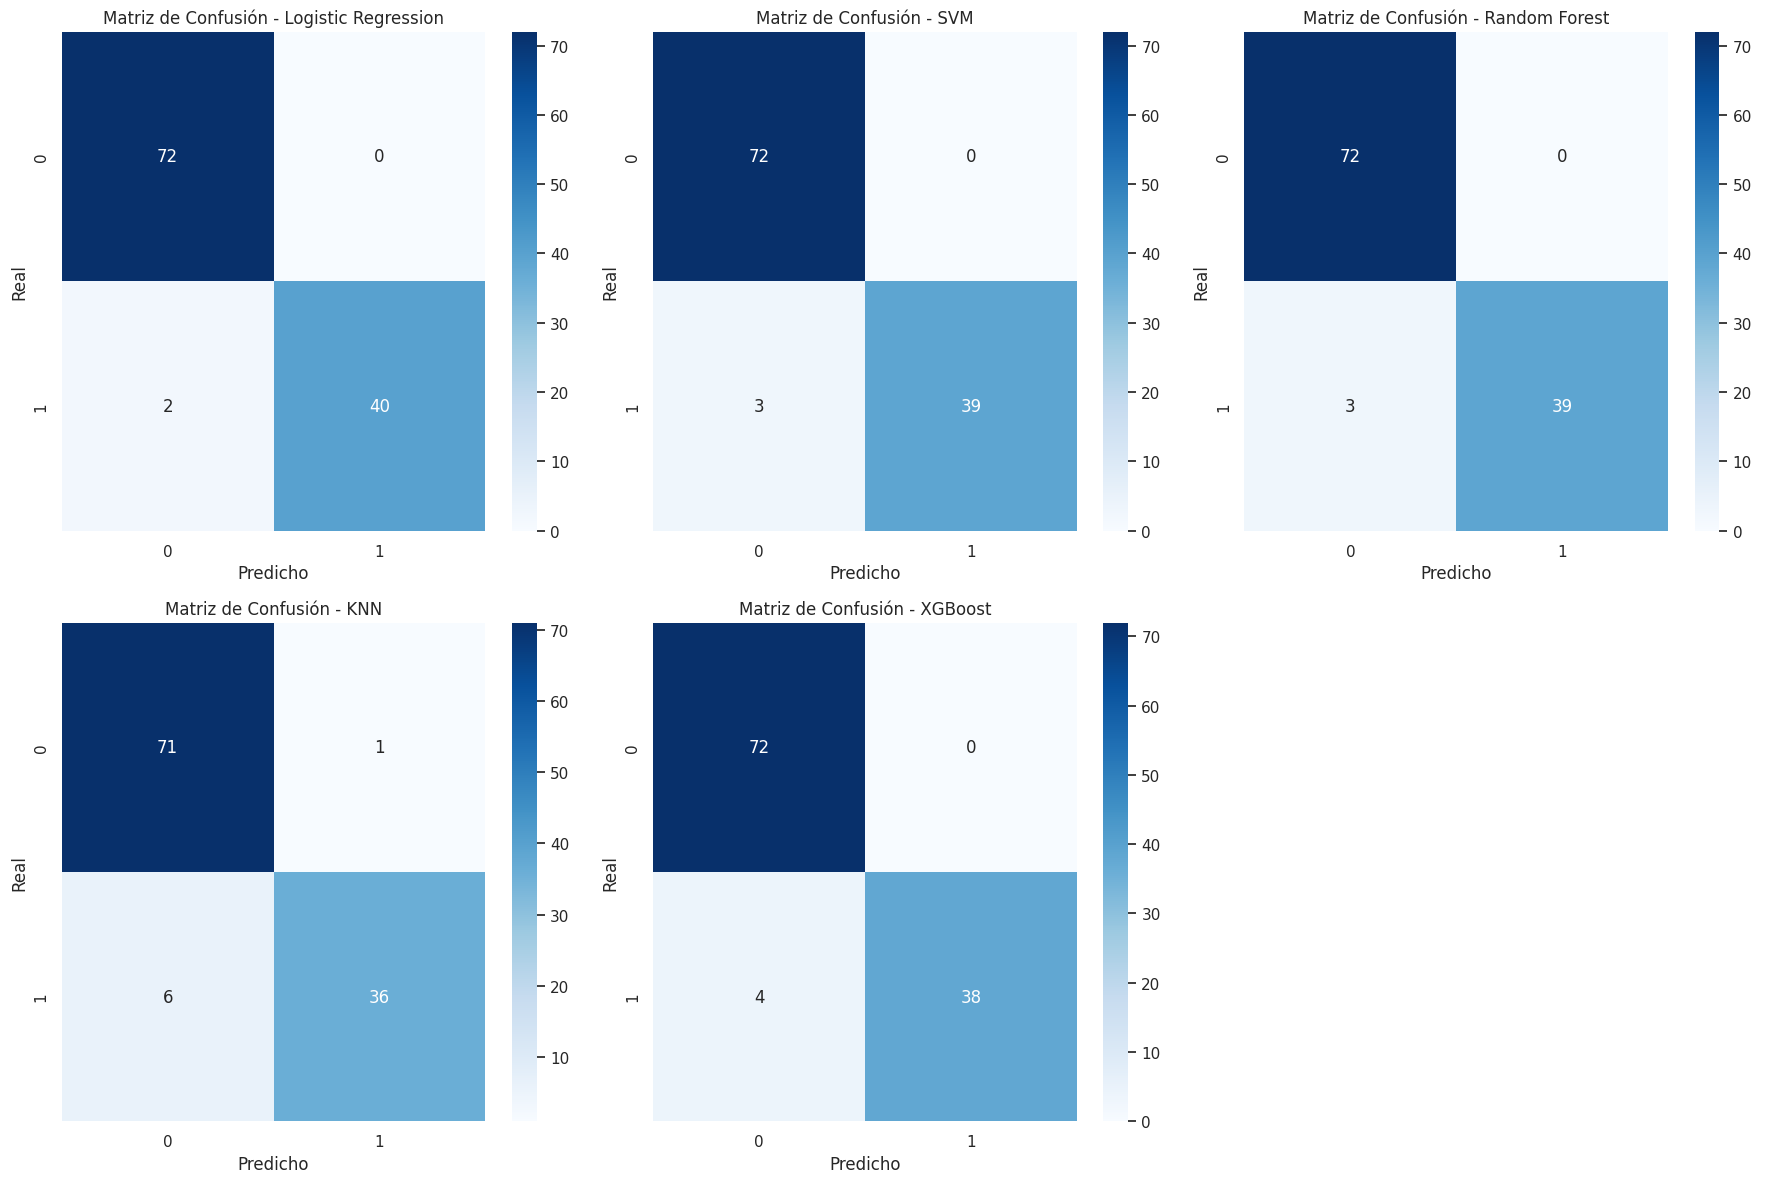

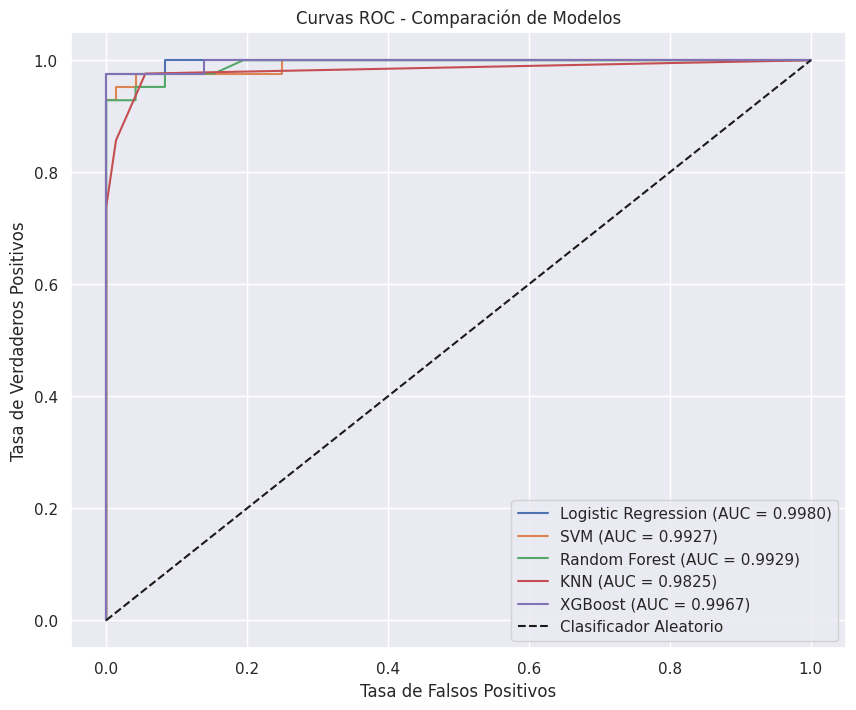

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Usar el conjunto procesado de la sección anterior
X_for_modeling = X_processed

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_for_modeling, y, test_size=0.2, random_state=42, stratify=y
)

# Definir modelos y parámetros para GridSearch
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs'],
            'max_iter': [1000]
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    }
}

# Entrenamiento y evaluación de modelos
results = {}
best_models = {}

for model_name, model_config in models.items():
    print(f"\n{model_name} ")

    # Búsqueda de hiperparámetros
    grid_search = GridSearchCV(
        model_config['model'],
        model_config['params'],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Mejor modelo
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Predicciones
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # AUC-ROC
    if y_pred_proba is not None:
        auc_roc = roc_auc_score(y_test, y_pred_proba)
    else:
        # Para SVM
        decision_scores = best_model.decision_function(X_test)
        auc_roc = roc_auc_score(y_test, decision_scores)
        y_pred_proba = decision_scores  # Para uso en curvas ROC

    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_roc': auc_roc,
        'best_params': grid_search.best_params_
    }

    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

# Comparación de resultados
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('auc_roc', ascending=False)
print(f"\n Comparación de modelos ")
print(results_df)

# Matrices de confusión
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión - {model_name}')
    axes[i].set_xlabel('Predicho')
    axes[i].set_ylabel('Real')

# Eliminar eje vacío si hay número impar de modelos
if len(best_models) < len(axes):
    for i in range(len(best_models), len(axes)):
        axes[i].axis('off')
plt.tight_layout()
plt.show()

# Curvas ROC
plt.figure(figsize=(10, 8))
for model_name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Para SVM
        y_pred_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend()
plt.grid(True)
plt.show()

### Ranking por AUC-ROC**:

Vemos de Logist Regression tiene mejor AUC = 0.998, aunque no es tan lejos de los otros valores.

### Análisis de Métricas:

**Precisión vs Recall**:
- Logistic Regression tiene las mejor recall con 0.952381 y KNN la menor pero no por mucho ya que esta es de 0.857143. Es alta en todos los modelos
- La precisión es lato en todos los modelos pero en KNN es más baja.

### Matrices de Confusión
Todos los modelos muestran:
- Muy pocos falsos negativos (crítico en diagnóstico médico)
- Falsos positivos controlados
- Alta especificidad y sensibilidad

**Elección de modelo**:

Creo que Logistic Regression es la opción natural a esocger porque es el más alto en todo.





5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [14]:
# Identificar el mejor modelo
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]
best_metrics = results_df.iloc[0]

print(f"Mejor modelo: {best_model_name}")
print(f"Métricas del mejor modelo:")
print(f"  - Accuracy: {best_metrics['accuracy']:.4f}")
print(f"  - Precision: {best_metrics['precision']:.4f}")
print(f"  - Recall: {best_metrics['recall']:.4f}")
print(f"  - F1-Score: {best_metrics['f1']:.4f}")
print(f"  - AUC-ROC: {best_metrics['auc_roc']:.4f}")

Mejor modelo: Logistic Regression
Métricas del mejor modelo:
  - Accuracy: 0.9825
  - Precision: 1.0000
  - Recall: 0.9524
  - F1-Score: 0.9756
  - AUC-ROC: 0.9980


El mejor modelo fue Logistic Regression.

Reflexiones:

**Sobre preprocesamiento:**

Es intenresante ver que se puede optimizar el análisas de datos con este.

**Sobre la reducción de dimensionalidad:**
Fue interesante ver cómo tanto PCA como t-SNE mostraban una clara separación entre los tumores benignos y malignos.

Aunque los resultados son buenos, siempre hay espacio para mejorar:
- Probar con más técnicas de balanceo de datos
- Incluir validación con datos de otros hospitales
- Desarrollar una interfaz que muestre no solo la predicción, sino también el nivel de confianza
